In [1]:
import mat73
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

/mnt/home/ykuang/miniconda3/envs/retinal_wave/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Large Model Retinal Waves

In [4]:
data = np.load("/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_labeled.npy",allow_pickle=True)

In [24]:
type(data)

numpy.ndarray

In [9]:
data[0].shape

(97, 32, 32)

In [10]:
data[1].shape

(111, 32, 32)

In [11]:
data.shape

(791,)

In [23]:
np.vstack(data).shape

(237424, 32, 32)

In [25]:
model_wave_timepoints = np.array([len(data_i) for data_i in data])

In [27]:
np.save("/mnt/home/ykuang/ceph/retinal_waves_learning/data/model_wave_timepoints.npy", model_wave_timepoints)

In [37]:
frames = np.vstack(data)
frames.shape

(237424, 32, 32)

In [38]:
scaler = StandardScaler()
model_waves = scaler.fit_transform(frames.reshape(237424,32*32))
model_waves = (model_waves - model_waves.min())/(model_waves.max()-model_waves.min())

In [39]:
model_waves.shape

(237424, 1024)

In [40]:
model_waves = model_waves.reshape(237424,32,32)

In [41]:
model_waves = torch.from_numpy(model_waves)

In [42]:
model_waves = model_waves.unsqueeze(1)
model_waves.shape

torch.Size([237424, 1, 32, 32])

In [45]:
torch.save(model_waves.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data.pt")

In [47]:
model_waves = torch.cat([model_waves,model_waves,model_waves],dim=1)

In [48]:
model_waves.shape

torch.Size([237424, 3, 32, 32])

In [49]:
torch.save(model_waves.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data_three_channels.pt")

In [2]:
frames = mat73.loadmat("/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_only_waves.mat")['V']

In [3]:
frames.shape

(250001, 32, 32)

In [4]:
frames = frames[0:20000]

In [5]:
scaler = StandardScaler()
model_waves = scaler.fit_transform(frames.reshape(20000,32*32))
model_waves = (model_waves - model_waves.min())/(model_waves.max()-model_waves.min())

In [6]:
model_waves = model_waves.reshape(20000,32,32)

In [7]:
model_waves = torch.from_numpy(model_waves)

In [8]:
model_waves = model_waves.unsqueeze(1)

In [9]:
model_waves.shape

torch.Size([20000, 1, 32, 32])

In [10]:
torch.save(model_waves.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data.pt")

In [11]:
model_waves = torch.cat([model_waves,model_waves,model_waves],dim=1)

In [12]:
model_waves.shape

torch.Size([20000, 3, 32, 32])

In [13]:
torch.save(model_waves.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data_three_channels.pt")

In [2]:
model_waves = np.load("/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model.npy")

In [3]:
model_waves = torch.from_numpy(model_waves)

In [4]:
model_waves.shape

torch.Size([20000, 32, 32])

In [5]:
scaler = StandardScaler()
model_waves = scaler.fit_transform(model_waves.reshape(20000,32*32))
model_waves = (model_waves - model_waves.min())/(model_waves.max()-model_waves.min())
model_waves = model_waves.reshape(20000,32,32)

In [6]:
model_waves = torch.from_numpy(model_waves)

In [7]:
model_waves = model_waves.unsqueeze(1)

In [8]:
model_waves.shape

torch.Size([20000, 1, 32, 32])

In [9]:
torch.save(model_waves, "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data.pt")

In [10]:
model_waves = torch.cat([model_waves,model_waves,model_waves],dim=1)

In [11]:
model_waves.shape

torch.Size([20000, 3, 32, 32])

In [12]:
torch.save(model_waves, "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_model_data_three_channels.pt")

In [2]:
frames = mat73.loadmat("/mnt/home/ykuang/ceph/retinal_waves_learning/data/rw_model_72k_V.mat")['V']

In [3]:
frames = frames[0:72000]
frames.shape

(72000, 32, 32)

In [4]:
frames = torch.from_numpy(frames)
frames.shape

torch.Size([72000, 32, 32])

In [6]:
scaler = StandardScaler()
model_waves = scaler.fit_transform(frames.reshape(72000,32*32))
model_waves = (model_waves - model_waves.min())/(model_waves.max()-model_waves.min())

In [9]:
model_waves = model_waves.reshape(72000,32,32)  # shape: (72000, 128, 128)
model_waves.shape

(72000, 32, 32)

In [10]:
model_waves = model_waves.reshape([72000, 1, 32, 32])
model_waves.shape

(72000, 1, 32, 32)

In [15]:
model_waves = torch.from_numpy(model_waves)

In [16]:
model_waves.shape

torch.Size([72000, 1, 32, 32])

In [29]:
torch.save(model_waves.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/model_wave_tensor.pt")

In [18]:
model_waves_three_channels = torch.cat([model_waves,model_waves,model_waves],dim=1)
model_waves_three_channels.shape

torch.Size([72000, 3, 32, 32])

In [26]:
torch.save(model_waves_three_channels.float(), "/mnt/home/ykuang/ceph/retinal_waves_learning/data/model_wave_tensor_three_channels.pt")

In [25]:
model_waves_three_channels.float().shape

torch.Size([72000, 3, 32, 32])

In [28]:
model_waves.float().shape

torch.Size([72000, 1, 32, 32])

In [10]:
import matplotlib.pyplot as plt

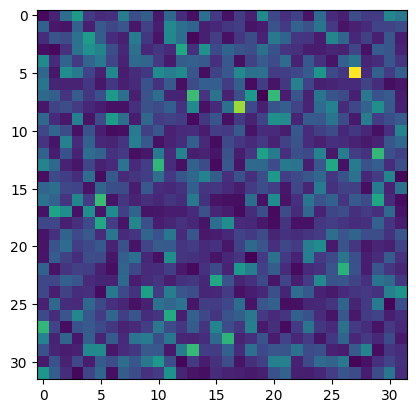

In [17]:
plt.imshow(frames[91].reshape(32,32))


curr_ind=90


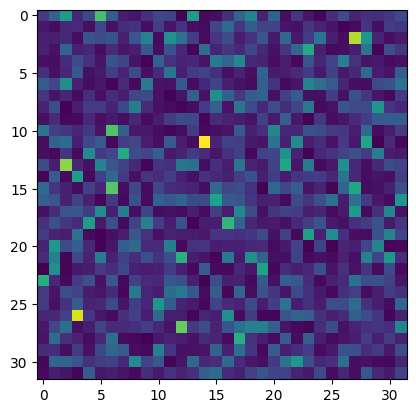

curr_ind=91


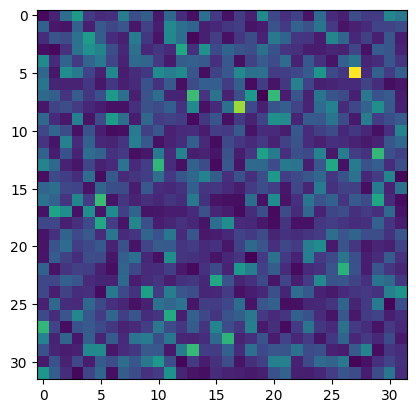

curr_ind=92


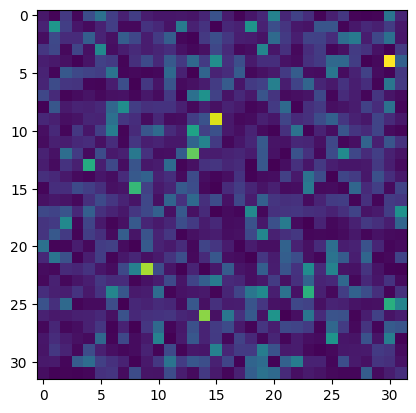

curr_ind=93


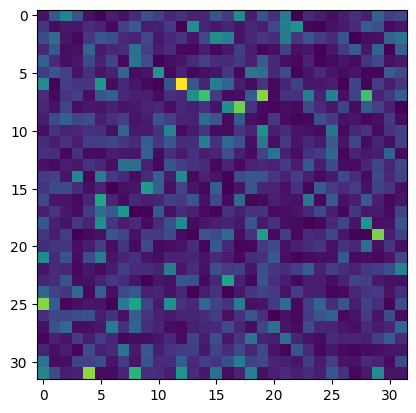

curr_ind=94


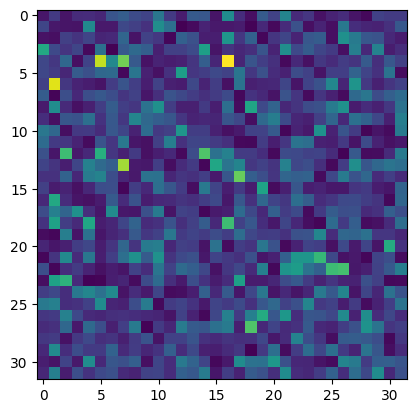

curr_ind=95


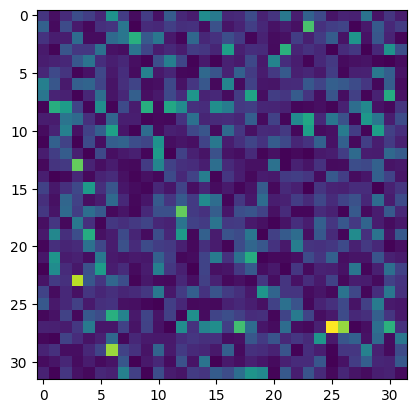

curr_ind=96


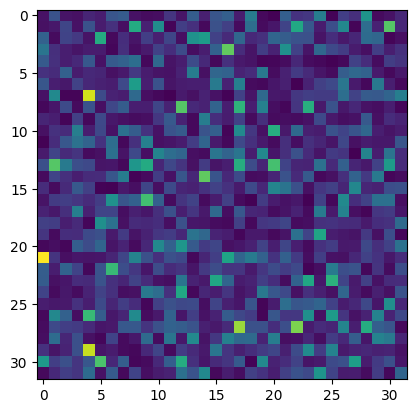

curr_ind=97


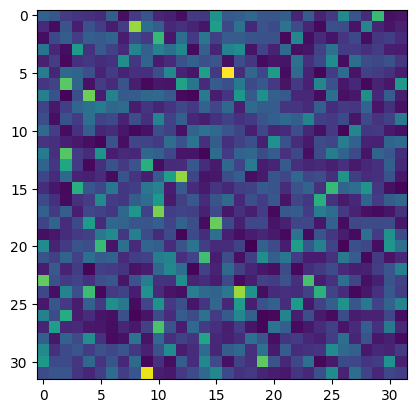

curr_ind=98


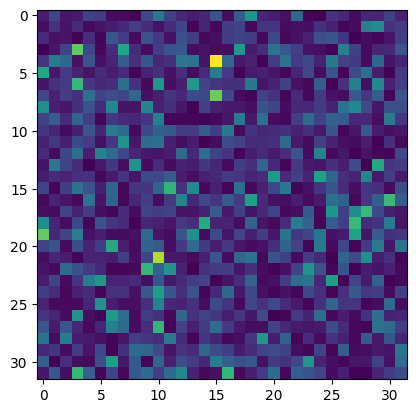

curr_ind=99


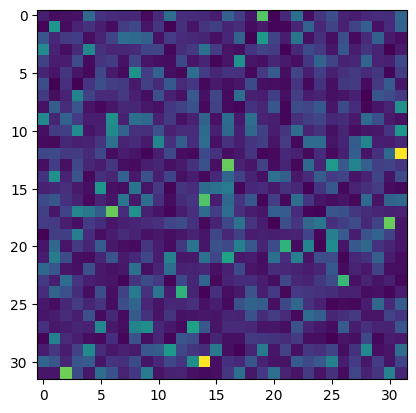

curr_ind=100


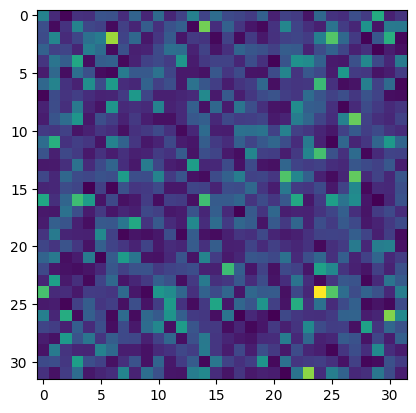

curr_ind=101


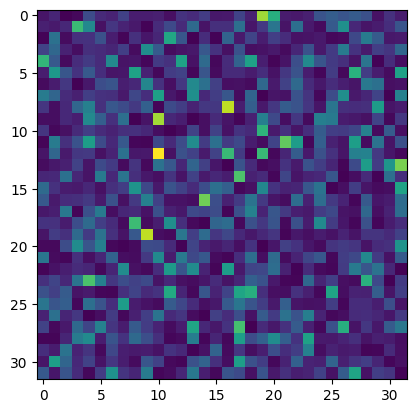

curr_ind=102


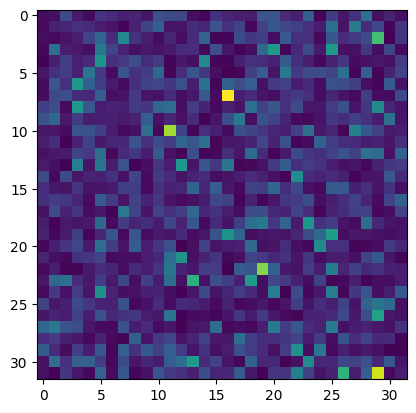

curr_ind=103


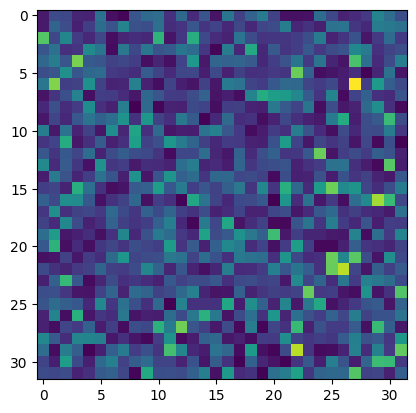

curr_ind=104


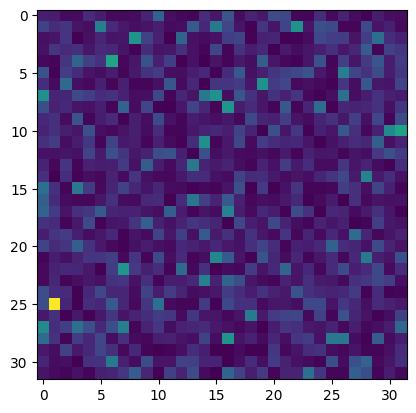

curr_ind=105


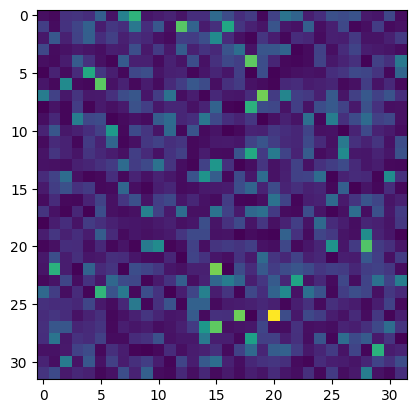

curr_ind=106


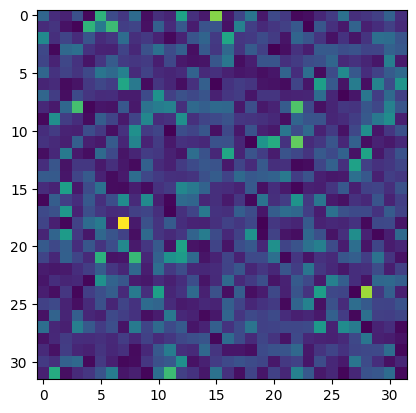

curr_ind=107


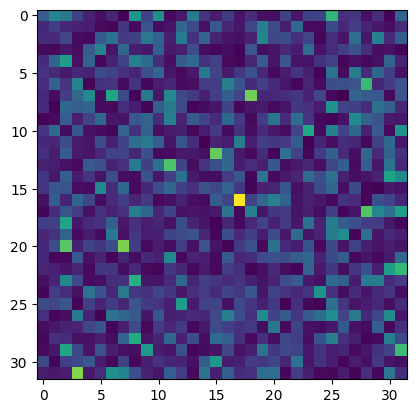

curr_ind=108


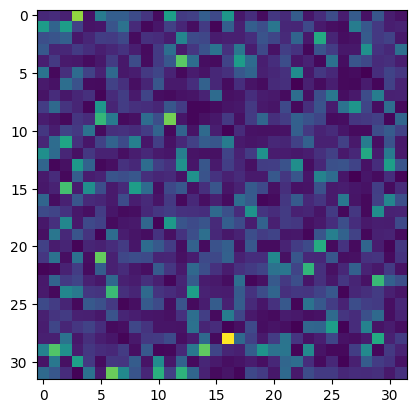

curr_ind=109


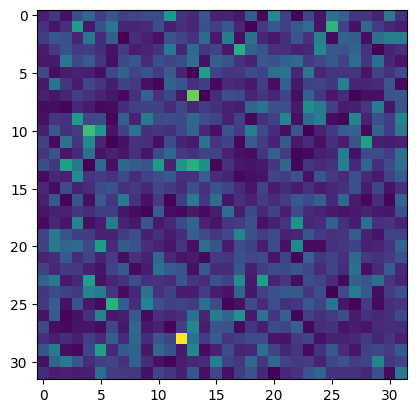

In [18]:
for curr_ind in range(90,110,1):
    print(f"curr_ind={curr_ind}")
    plt.imshow(frames[curr_ind].reshape(32,32))
    plt.show()

In [2]:
import torch

In [21]:
retinal_image_dataset_path = "/mnt/home/ykuang/ceph/retinal_waves_learning/data/large_area_real_data.pt"

In [22]:
retinal_image_dataset = torch.load(retinal_image_dataset_path)

In [23]:
retinal_image_dataset.shape

torch.Size([20000, 1, 32, 32])

In [24]:
import matplotlib.pyplot as plt

curr_ind=2520


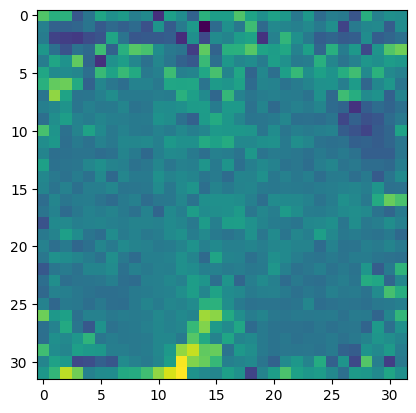

curr_ind=2521


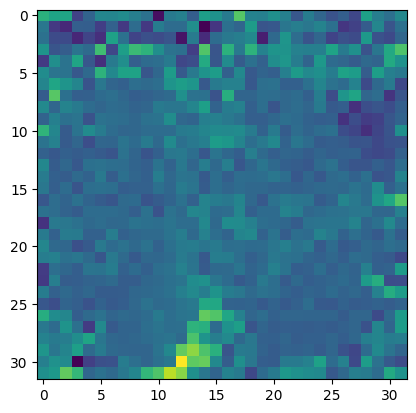

curr_ind=2522


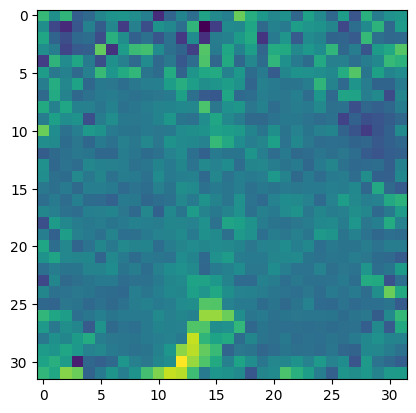

curr_ind=2523


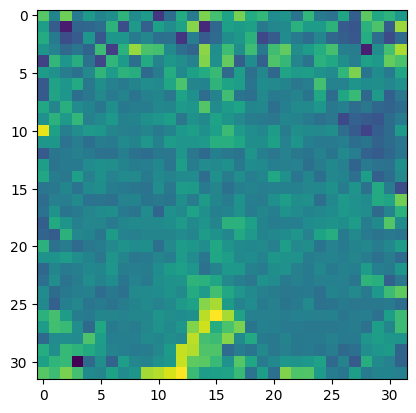

curr_ind=2524


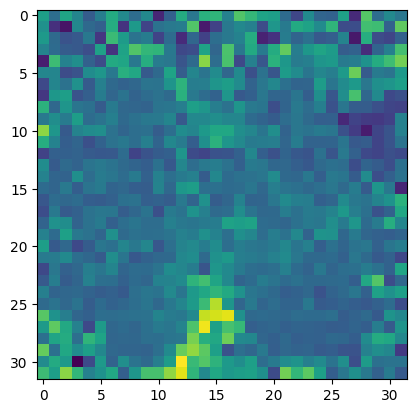

curr_ind=2525


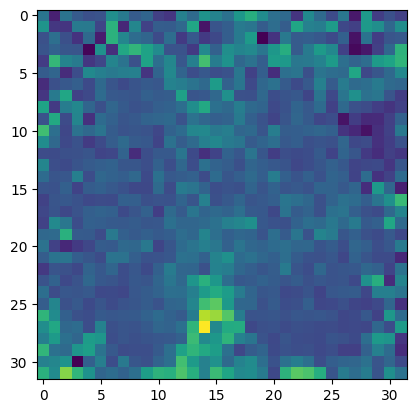

curr_ind=2526


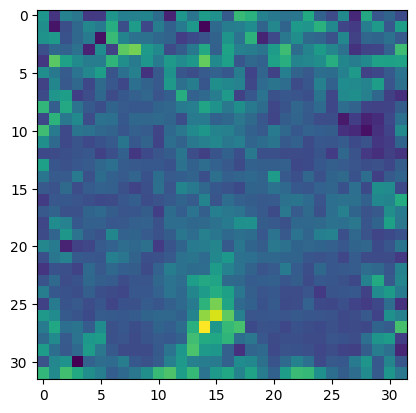

curr_ind=2527


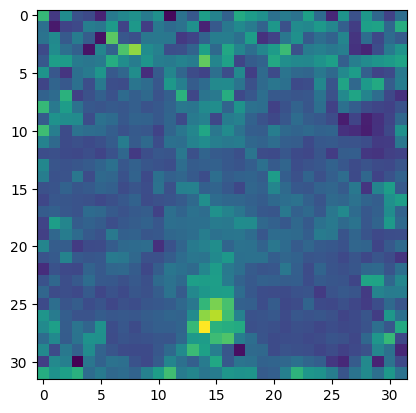

curr_ind=2528


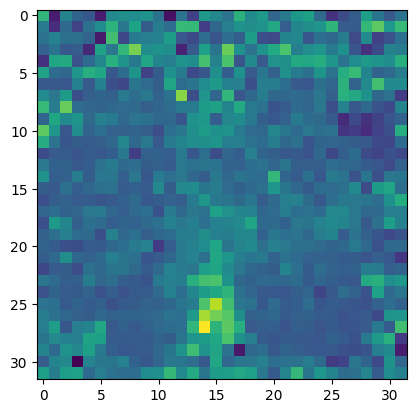

curr_ind=2529


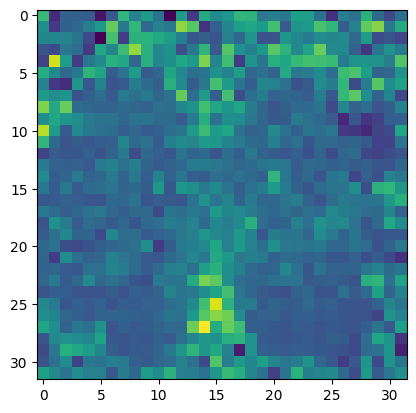

In [25]:
for curr_ind in range(2520,2530,1):
    print(f"curr_ind={curr_ind}")
    plt.imshow(retinal_image_dataset[curr_ind].reshape(32,32))
    plt.show()